In [2]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
# 設定中文字型
rcParams['font.family'] = ['Microsoft JhengHei', 'sans-serif']
# 使用正確的負號
rcParams['axes.unicode_minus'] = False
teen_phone = pd.read_csv('teen_phone_addiction_dataset.csv',sep = ',')

In [3]:
for col in teen_phone.columns:
    print(f'{col}欄位單一值 : ')
    print(teen_phone[col].unique())

ID欄位單一值 : 
[   1    2    3 ... 2998 2999 3000]
Name欄位單一值 : 
['Shannon Francis' 'Scott Rodriguez' 'Adrian Knox' ... 'Norman Hughes'
 'Barbara Hinton' 'Curtis Johnson']
Age欄位單一值 : 
[13 17 18 14 16 19 15]
Gender欄位單一值 : 
['Female' 'Other' 'Male']
Location欄位單一值 : 
['Hansonfort' 'Theodorefort' 'Lindseystad' ... 'Rebeccaton' 'Ramirezmouth'
 'Lake Alexander']
School_Grade欄位單一值 : 
['9th' '7th' '11th' '12th' '10th' '8th']
Daily_Usage_Hours欄位單一值 : 
[ 4.   5.5  5.8  3.1  2.5  3.9  6.3  5.1  3.   4.9  1.6  7.4  8.7  6.4
  4.4  5.4  7.9  2.7  6.9  4.6  6.2  6.6  8.6  4.1  4.2  8.   3.3  4.7
  8.3  1.7  5.2  1.   6.7  7.1  8.1  4.3  9.   4.5  5.9  2.9  3.4  3.7
  5.3  6.8  7.   6.5  4.8  7.6  3.8  7.3  0.7  7.2  2.8  2.2  5.6  2.
  3.6  2.1  7.8  2.6  7.7  0.   5.   5.7  6.   8.4  0.8  2.4  1.8  0.2
  7.5  0.5  8.5  3.5  6.1  8.8  8.9 10.6  9.7  8.2  3.2  9.2  1.9  1.4
 10.2  1.1  9.3  0.4  2.3  9.1  1.5 10.5  0.6 11.   0.3  1.3  0.9  9.4
  9.5  9.8  1.2 10.3 10.1 10.9  0.1 11.2 11.5]
Sleep_Hours欄位單一

In [4]:
teen_phone.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [5]:
teen_phone['Location'].value_counts()

Location
North Michael        6
Lake Michael         5
North Jennifer       4
Lake James           4
North Christopher    4
                    ..
Lake Carolynfort     1
Butlerville          1
Kyleshire            1
Jaybury              1
Lake Alexander       1
Name: count, Length: 2726, dtype: int64

In [6]:
teen_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

資料清洗

In [8]:
#姓名、ID、地區對分析沒有用處，所以可以直接刪除(地區因為唯一值太多，所以刪除)
df = teen_phone
df = df.drop(columns = ['ID','Name','Location'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3000 non-null   int64  
 1   Gender                  3000 non-null   object 
 2   School_Grade            3000 non-null   object 
 3   Daily_Usage_Hours       3000 non-null   float64
 4   Sleep_Hours             3000 non-null   float64
 5   Academic_Performance    3000 non-null   int64  
 6   Social_Interactions     3000 non-null   int64  
 7   Exercise_Hours          3000 non-null   float64
 8   Anxiety_Level           3000 non-null   int64  
 9   Depression_Level        3000 non-null   int64  
 10  Self_Esteem             3000 non-null   int64  
 11  Parental_Control        3000 non-null   int64  
 12  Screen_Time_Before_Bed  3000 non-null   float64
 13  Phone_Checks_Per_Day    3000 non-null   int64  
 14  Apps_Used_Daily         3000 non-null   

探索性分析

由於欄位眾多，所以此次探索性分析會很多，因此先做主題分類
1.先觀察成癮欄位的分布
2.對每一欄的資料以圖表的方式呈現，可以先大了解概資料分布(分為數值行跟類別型)
3.對每一欄資料跟成癮欄位做對比(分為數值型跟類別型)


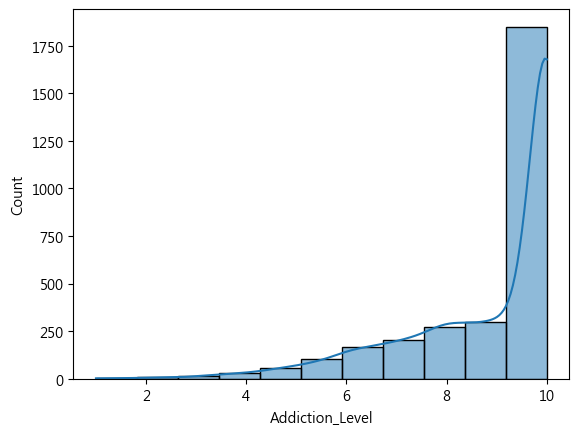

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Addiction_Level'], bins=11, kde=True)
plt.savefig('成癮等級人數分布圖', dpi = 300)

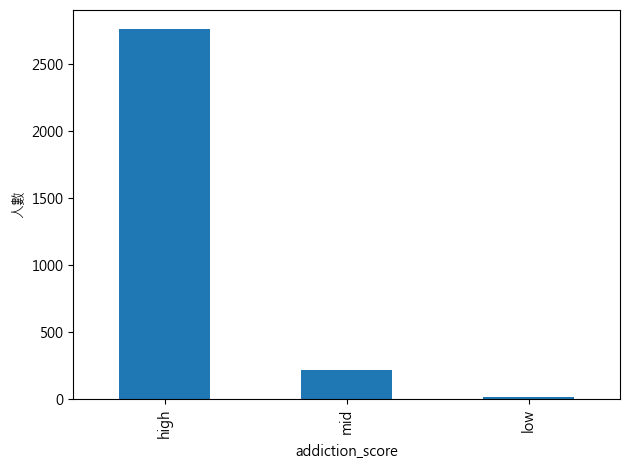

In [13]:
#為成癮等級做簡化分類
def addiction_score(score):
    if score <= 3:
        return 'low'
    elif score <= 6:
        return 'mid'
    else:
        return 'high'
df['addiction_score'] = df['Addiction_Level'].apply(addiction_score)
df['addiction_score'].value_counts().plot(kind = 'bar')
plt.ylabel('人數')
plt.tight_layout()
plt.savefig('成癮分數人數分布圖',dpi = 300)

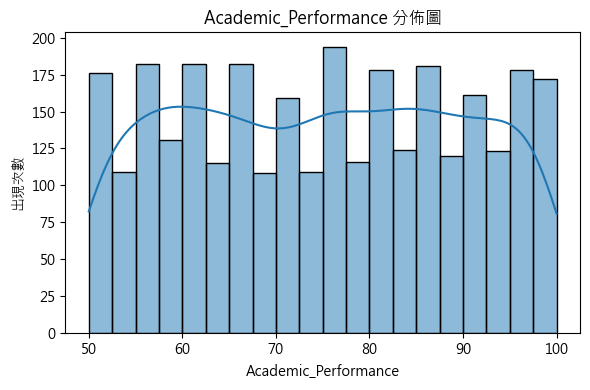

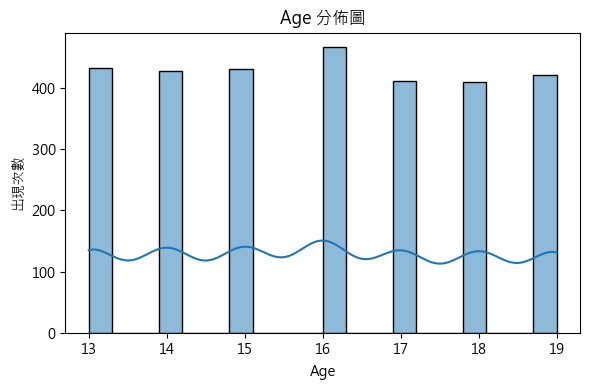

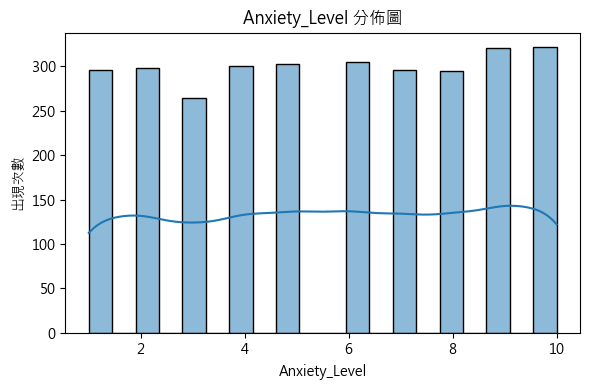

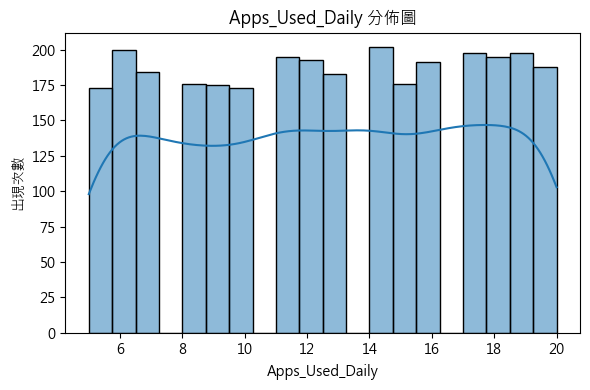

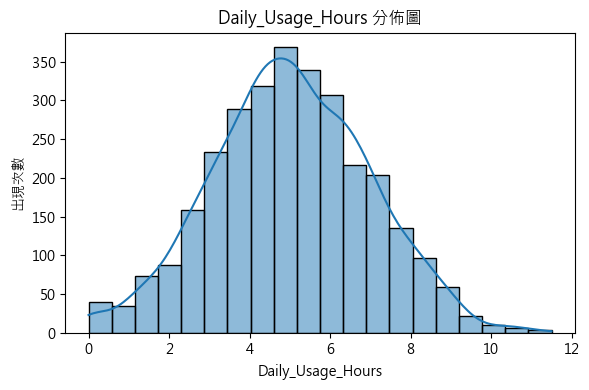

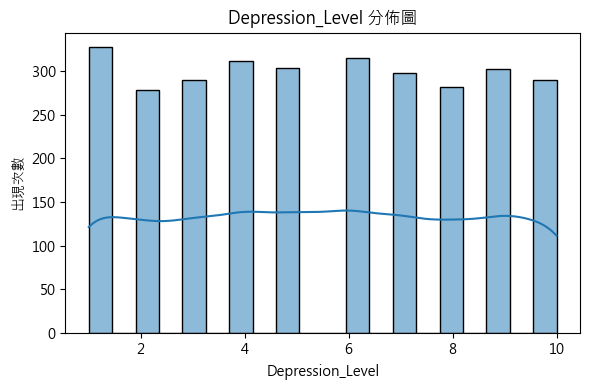

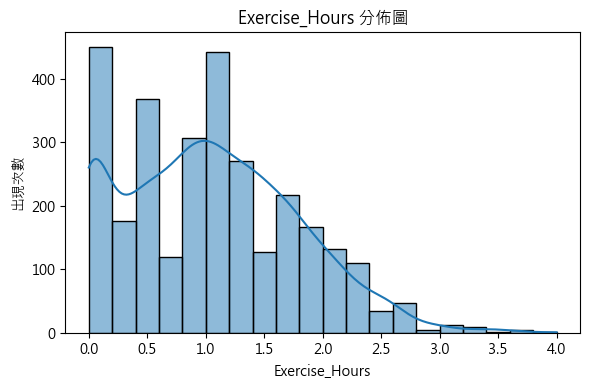

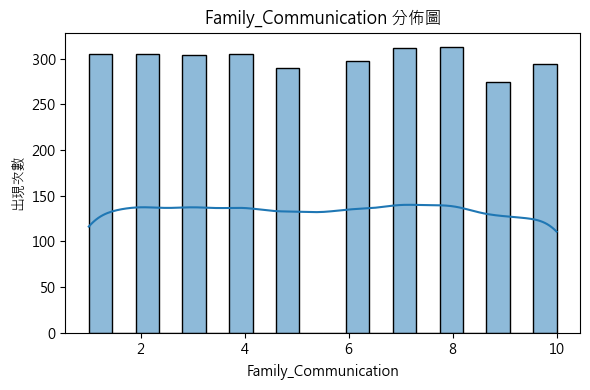

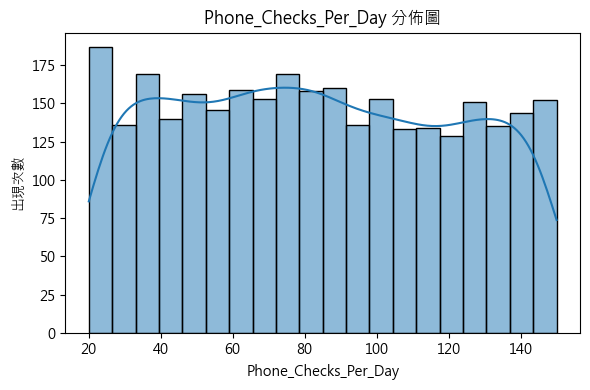

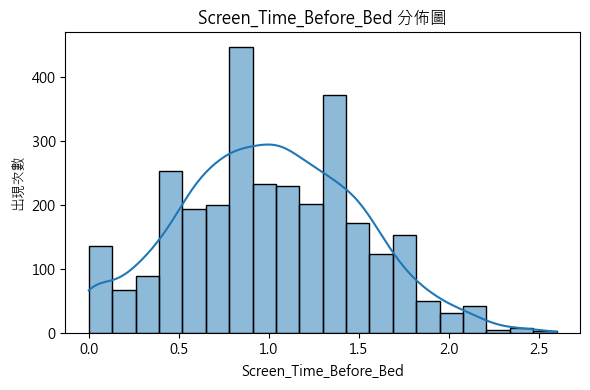

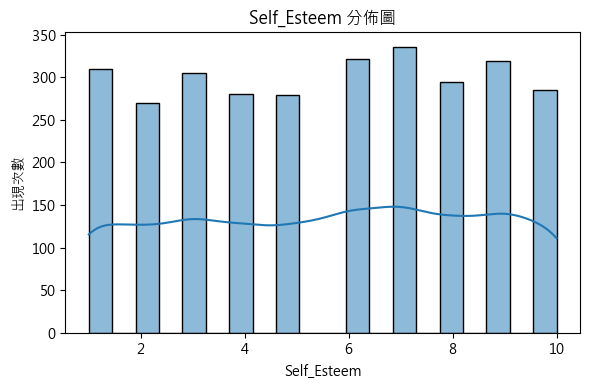

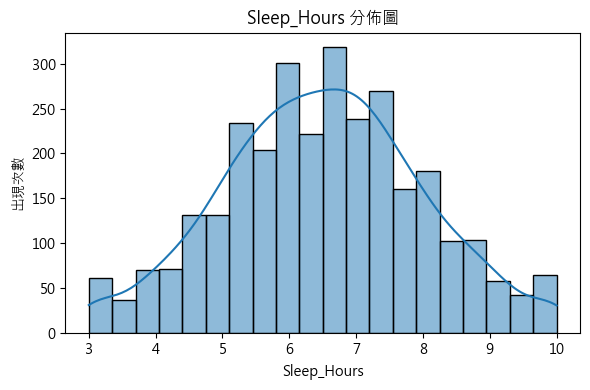

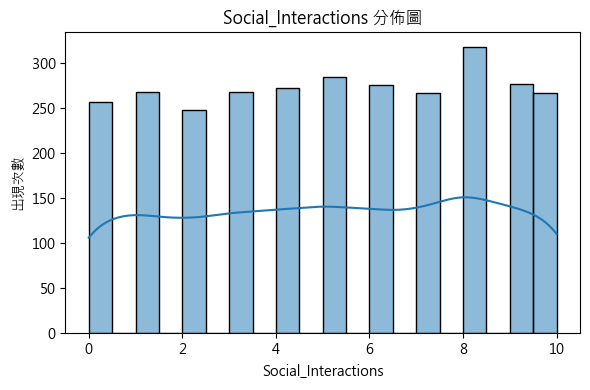

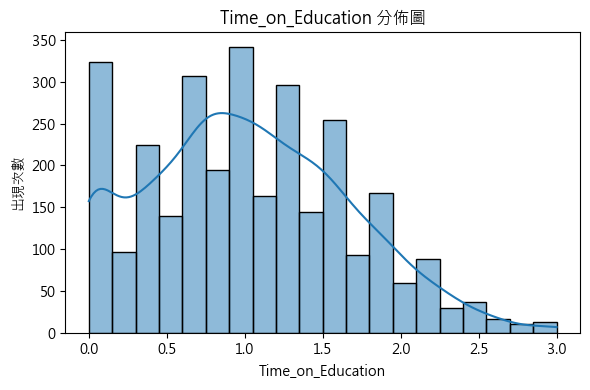

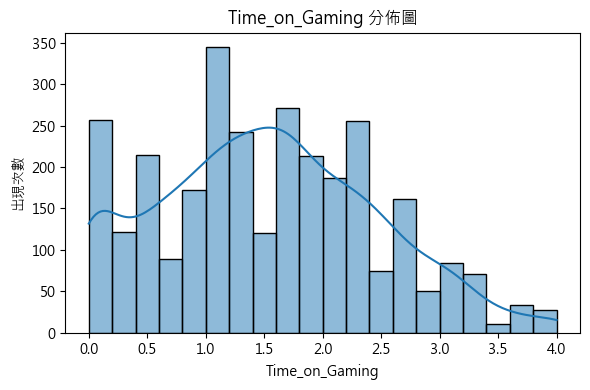

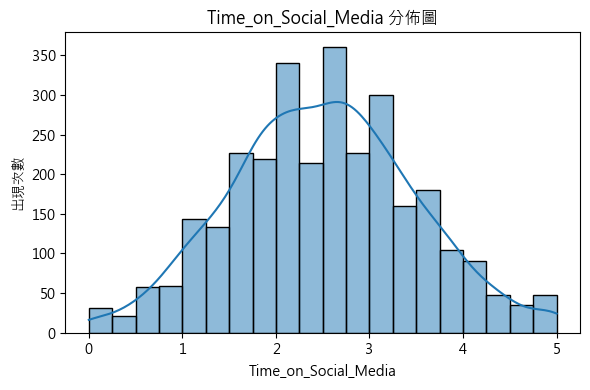

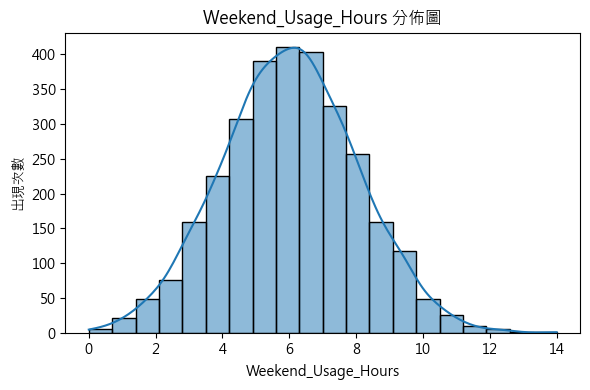

In [14]:
#每一欄以圖表方式呈現(數值，排除成癮等級跟家長監護欄位)
exclude = ['Addiction_Level','Parental_Control']
num_cols = df.select_dtypes(include = ['int64','float64']).columns.difference(exclude)
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} 分佈圖')
    plt.xlabel(col)
    plt.ylabel('出現次數')
    plt.tight_layout()
    plt.show()

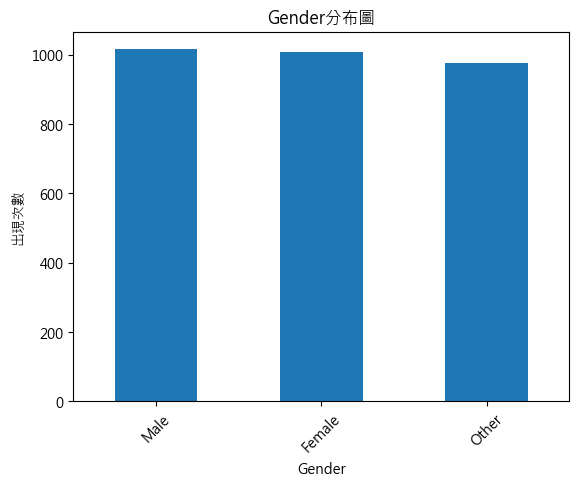

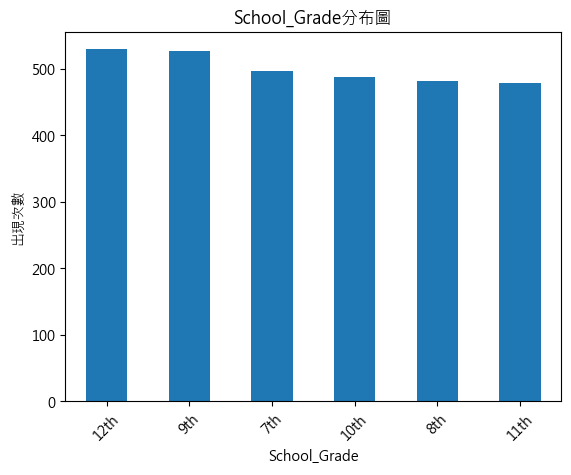

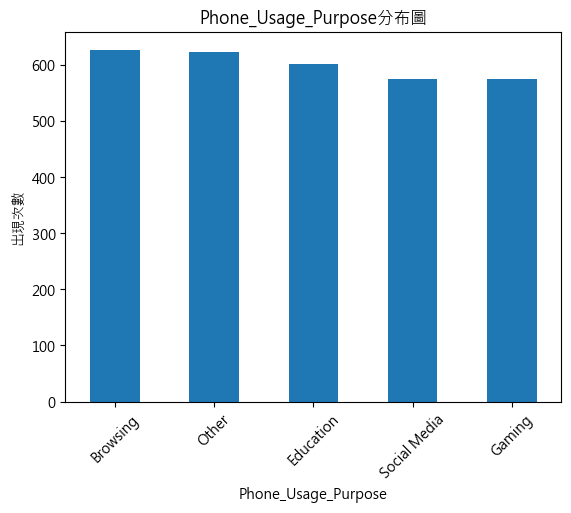

In [15]:
#每一欄以圖表方式呈現(類別型，排除成癮分數欄位)
obj_cols= df.select_dtypes(include = ['object']).columns.drop('addiction_score')
import seaborn as sns
import matplotlib.pyplot as plt
for col in obj_cols:
    df[col].value_counts().plot(kind = 'bar')
    plt.title(f'{col}分布圖')
    plt.xlabel(f'{col}')
    plt.ylabel('出現次數')
    plt.xticks(rotation = 45)
    plt.show()

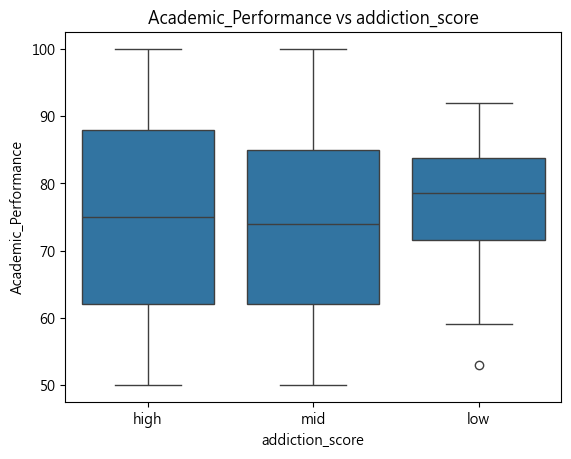

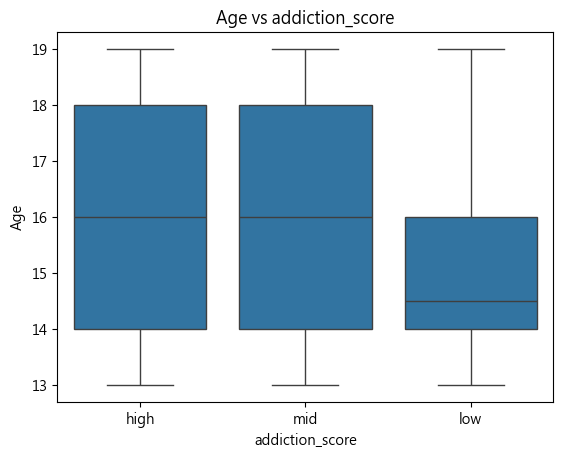

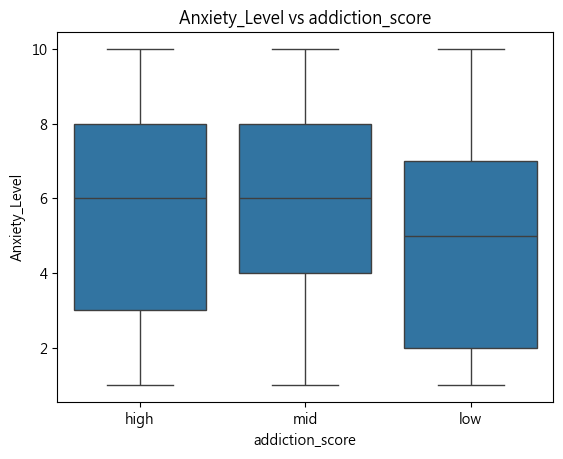

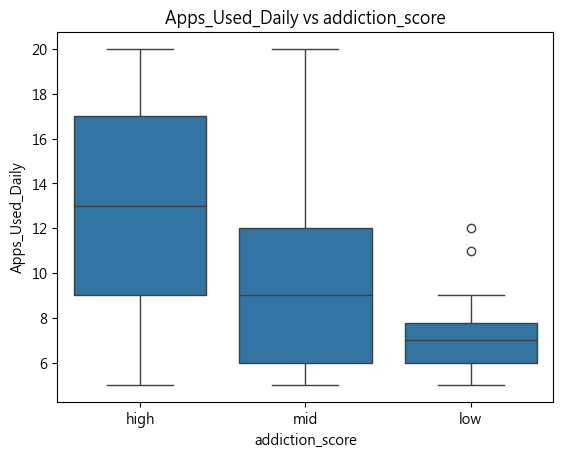

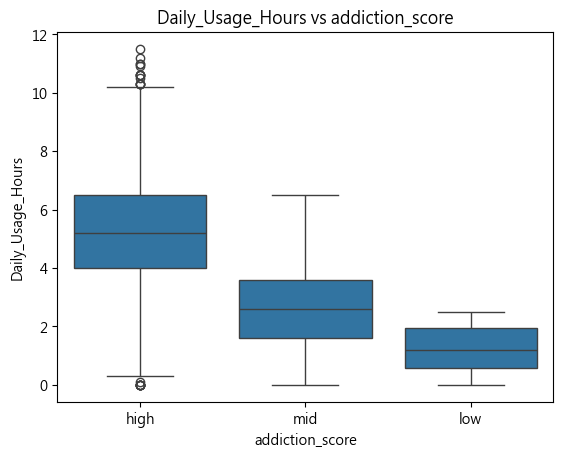

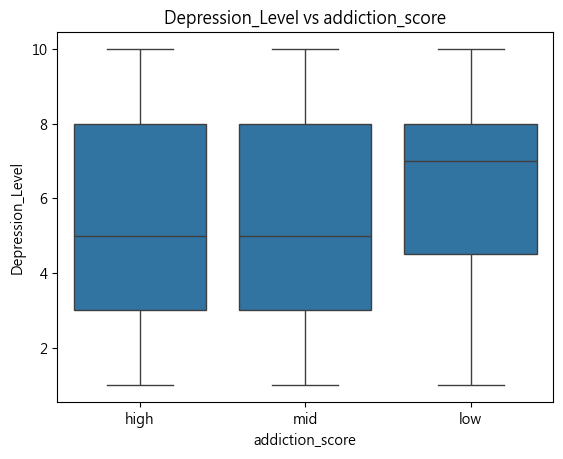

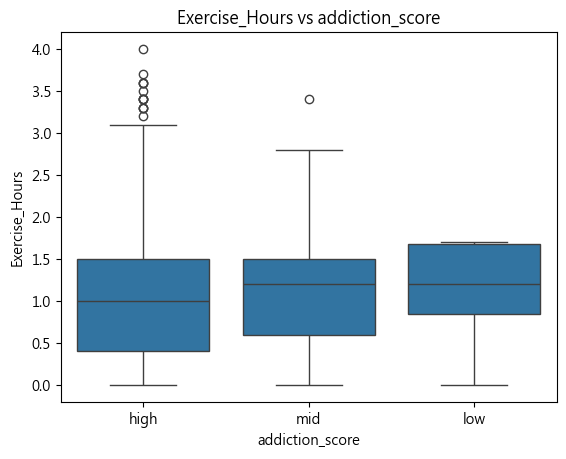

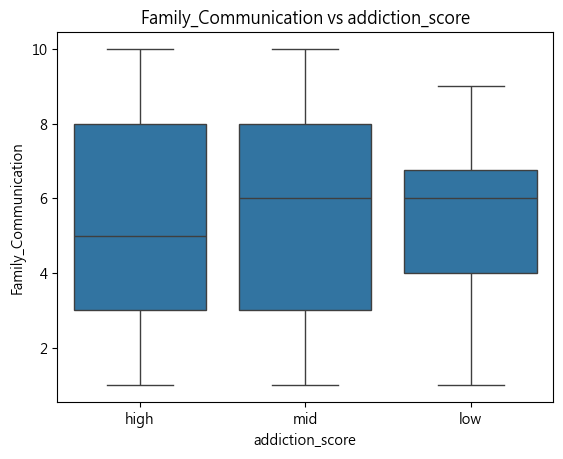

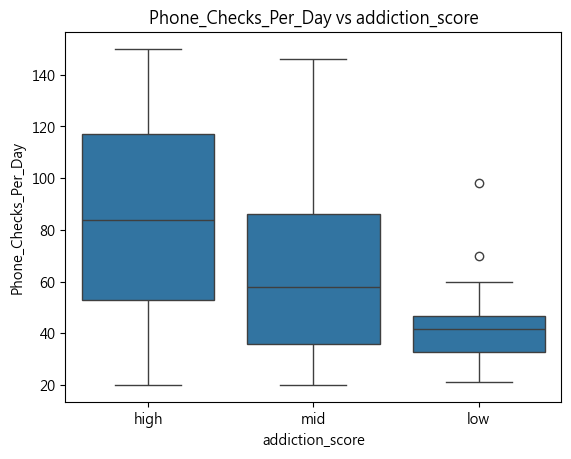

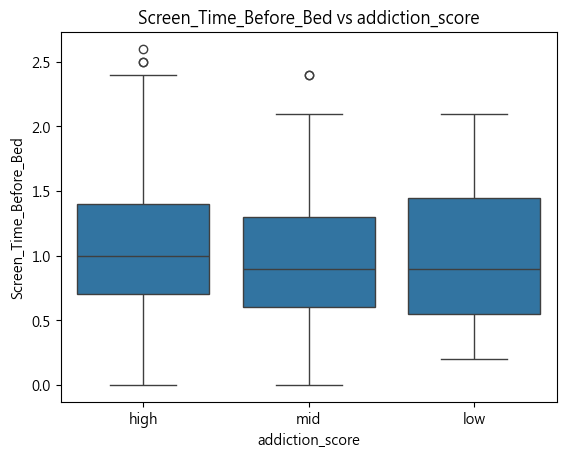

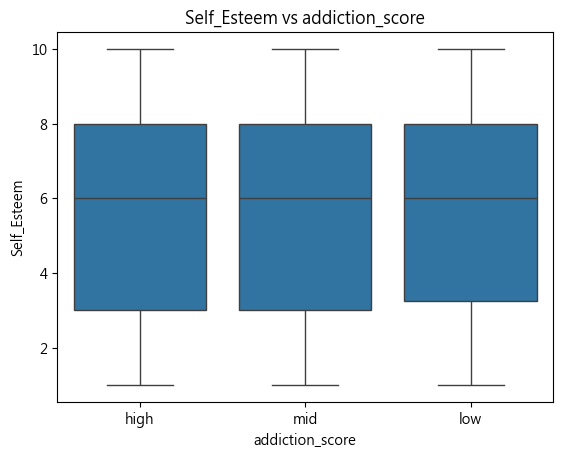

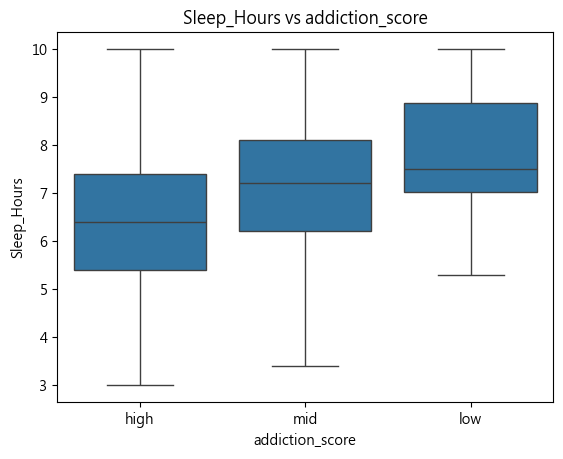

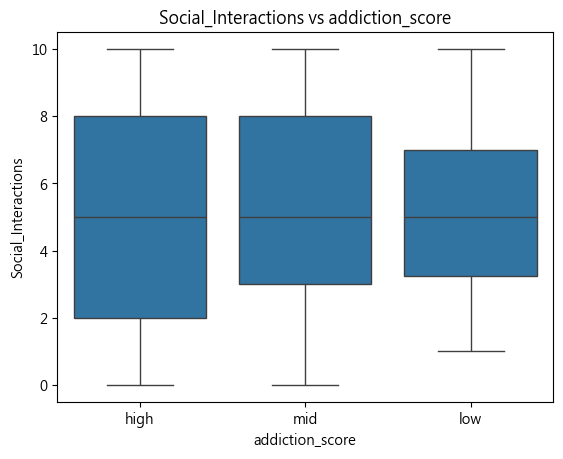

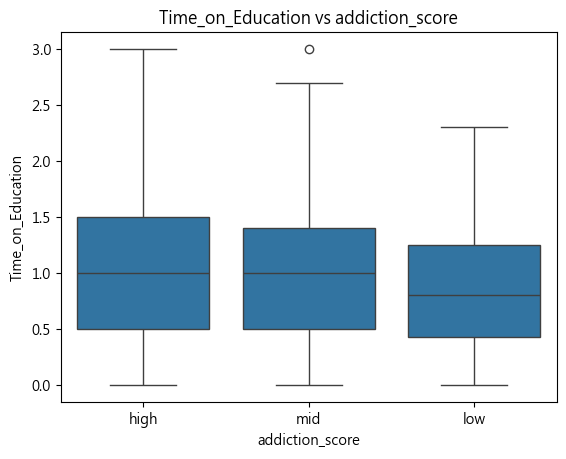

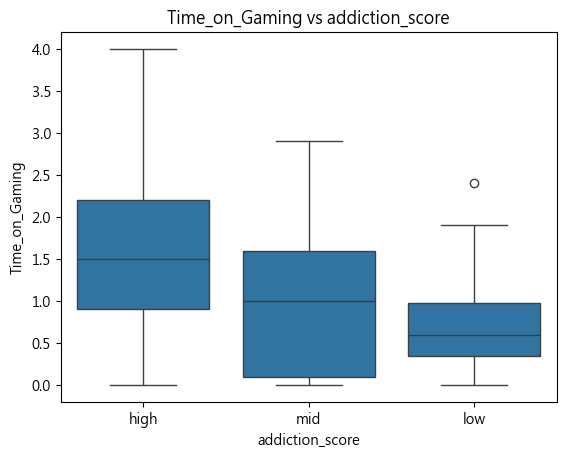

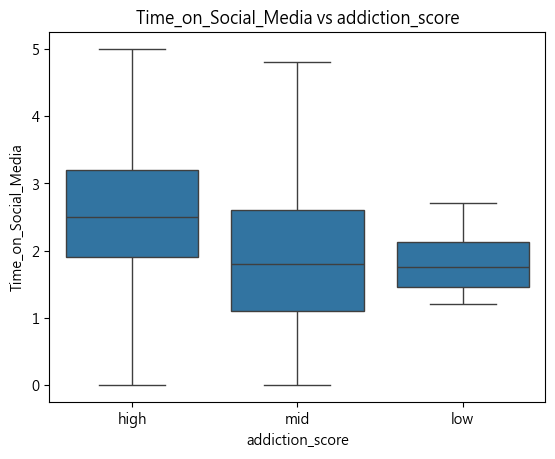

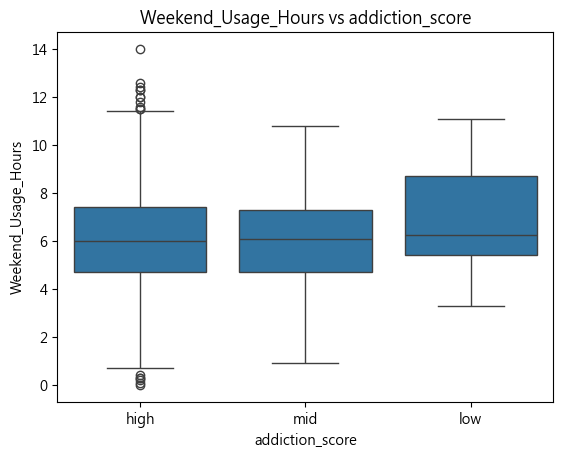

In [16]:
#將單一欄位跟成癮分數欄位做對比(數值型，排除成癮跟家長監護欄位)
exclude = ['Addiction_Level','Parental_Control']
num_cols = df.select_dtypes(include  = ['int64','float64']).columns.difference(exclude)
for col in num_cols:
    sns.boxplot(x = 'addiction_score', y = col , data = df)
    plt.title(f'{col} vs addiction_score')
    plt.show()

Text(0.5, 1.0, '各年級對應的成癮分布（百分比）')

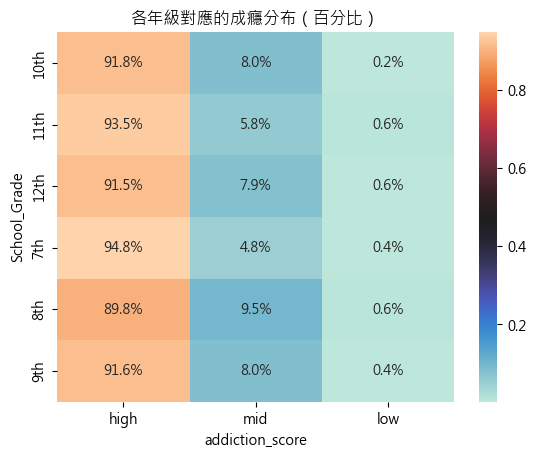

In [17]:
#不同類別變數跟成癮分數的對比
import seaborn as sns
crosstab = pd.crosstab(df['School_Grade'], df['addiction_score'], normalize='index')  # 行百分比
index = ['high' , 'mid' , 'low']
heatdf = crosstab.reindex(columns = index)
sns.heatmap(heatdf, annot=True, fmt='.1%', cmap='icefire')
plt.title('各年級對應的成癮分布（百分比）')

Text(0.5, 1.0, '各性別對應的成癮分布（百分比）')

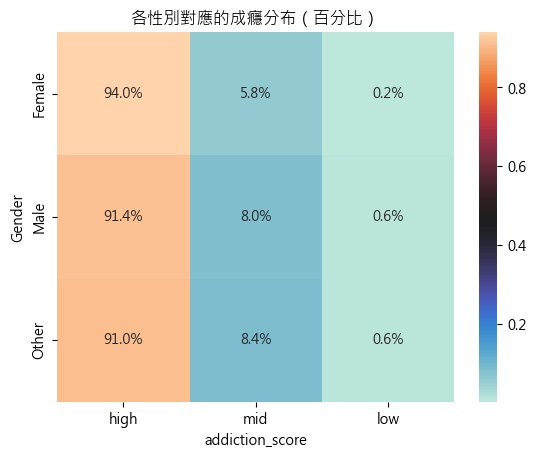

In [18]:
import seaborn as sns
crosstab = pd.crosstab(df['Gender'], df['addiction_score'], normalize='index')  # 行百分比
index = ['high' , 'mid' , 'low']
heatdf = crosstab.reindex(columns = index)
sns.heatmap(heatdf, annot=True, fmt='.1%', cmap='icefire')
plt.title('各性別對應的成癮分布（百分比）')

Text(0.5, 1.0, '手機使用目的對應成癮分布(百分比)')

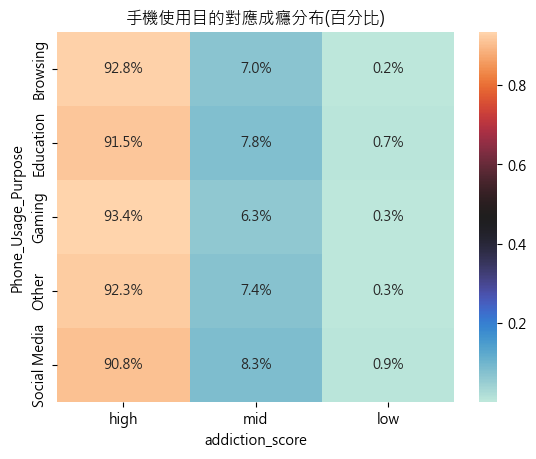

In [19]:
crosstab = pd.crosstab(df['Phone_Usage_Purpose'],df['addiction_score'],normalize = 'index')
index = ['high' , 'mid' , 'low']
heatdf = crosstab.reindex(columns = index)
sns.heatmap(heatdf , annot = True , fmt = '.1%' , cmap = 'icefire')
plt.title('手機使用目的對應成癮分布(百分比)')

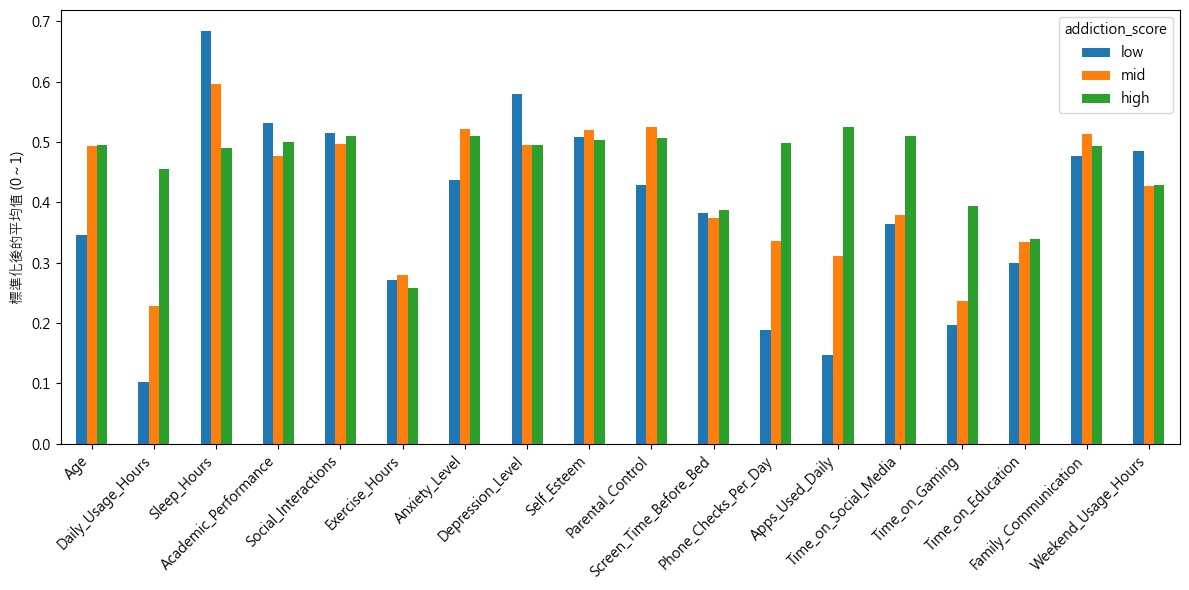

In [20]:
#為了避免某些欄位長條圖過高，而大部分的欄位長條圖都較低，使整張圖的觀感不佳，所以使用標準化來呈現圖表
from sklearn.preprocessing import MinMaxScaler
# 取所有數值欄位
num_col = df.select_dtypes(include=['int64', 'float64']).columns.drop('Addiction_Level')

# 對數值欄位做 Min-Max scaling(標準化)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_col] = scaler.fit_transform(df[num_col])

# 分組取平均，再畫圖
# align = 'center'，幫助 x 軸標籤對準長條圖的中心點
grouped = df_scaled.groupby('addiction_score')[num_col].mean()
group_index = ['low' , 'mid' , 'high']
grouped = grouped.reindex(group_index)
grouped.T.plot(kind = 'bar',align = 'center', figsize=(12,6))
#plt.title("不同成癮分類下（數值欄位標準化後）的平均值比較")
plt.ylabel("標準化後的平均值 (0～1)")
# ha = 'right'，讓文字對齊右側，避免擠在一起
plt.xticks(rotation = 45 , ha = 'right')
plt.tight_layout()
plt.savefig('不同成癮分類下的平均值比較')
plt.show()


In [21]:
from scipy.stats import pearsonr
import pandas as pd

target = 'Addiction_Level'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)

results = []
for col in numeric_cols:
    r, p = pearsonr(df[target], df[col])
    results.append({'變數': col, '相關係數': r, 'p值': p})

df_corr_p = pd.DataFrame(results)
df_corr_p['顯著性'] = df_corr_p['p值'].apply(lambda x: '極度顯著' if x < 0.001 else '非常顯著' if x < 0.01 else '顯著' if x < 0.05 else '不顯著')
df_corr_p = df_corr_p.sort_values(by='p值', key=abs, ascending=True)

print(df_corr_p)


                        變數      相關係數             p值   顯著性
1        Daily_Usage_Hours  0.600771  8.061434e-294  極度顯著
12         Apps_Used_Daily  0.319287   4.567902e-72  極度顯著
13    Time_on_Social_Media  0.306578   2.616866e-66  極度顯著
14          Time_on_Gaming  0.273060   1.907292e-52  極度顯著
11    Phone_Checks_Per_Day  0.246342   1.033363e-42  極度顯著
2              Sleep_Hours -0.216681   3.301597e-33  極度顯著
0                      Age  0.031306   8.645248e-02   不顯著
8              Self_Esteem -0.022292   2.222349e-01   不顯著
5           Exercise_Hours -0.021015   2.498641e-01   不顯著
6            Anxiety_Level  0.016005   3.808432e-01   不顯著
10  Screen_Time_Before_Bed  0.013784   4.504205e-01   不顯著
17     Weekend_Usage_Hours -0.013049   4.749473e-01   不顯著
3     Academic_Performance  0.012264   5.019052e-01   不顯著
4      Social_Interactions -0.010631   5.605448e-01   不顯著
16    Family_Communication -0.010482   5.660443e-01   不顯著
7         Depression_Level  0.008491   6.420195e-01   不顯著
9         Pare

C:\Users\rine2\AppData\Local\Temp\ipykernel_11992\2038061177.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target_corr.values, y = target_corr.index, palette='coolwarm')


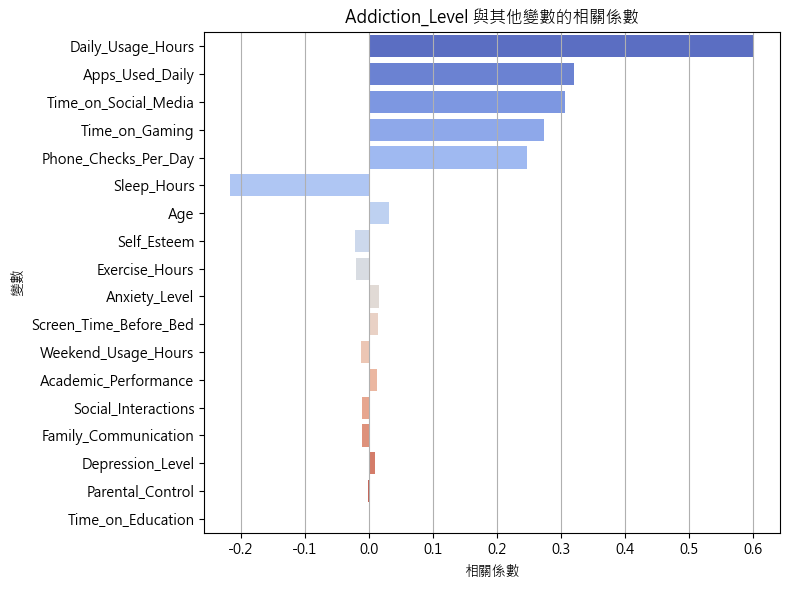

In [22]:
# 計算相關係數
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['Addiction_Level'].drop('Addiction_Level')

# 取絕對值排序（可改成 .sort_values(ascending=False) 看正相關為主）
target_corr = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

# 畫條形圖
plt.figure(figsize=(8,6))
sns.barplot(x = target_corr.values, y = target_corr.index, palette='coolwarm')
plt.title("Addiction_Level 與其他變數的相關係數")
plt.xlabel("相關係數")
plt.ylabel("變數")
plt.grid(True, axis='x') 
plt.tight_layout()
plt.savefig('成癮等級與其他變數的相關係數')
plt.show()


In [23]:
target_corr.sort_values(ascending = False)

Daily_Usage_Hours         0.600771
Apps_Used_Daily           0.319287
Time_on_Social_Media      0.306578
Time_on_Gaming            0.273060
Phone_Checks_Per_Day      0.246342
Age                       0.031306
Anxiety_Level             0.016005
Screen_Time_Before_Bed    0.013784
Academic_Performance      0.012264
Depression_Level          0.008491
Time_on_Education        -0.000586
Parental_Control         -0.001016
Family_Communication     -0.010482
Social_Interactions      -0.010631
Weekend_Usage_Hours      -0.013049
Exercise_Hours           -0.021015
Self_Esteem              -0.022292
Sleep_Hours              -0.216681
Name: Addiction_Level, dtype: float64

In [24]:
from scipy.stats import chi2_contingency
import numpy as np

cat_cols = ['Gender', 'School_Grade', 'Phone_Usage_Purpose']
results = {}

for col in cat_cols:
    table = pd.crosstab(df[col], df['addiction_score'])
    chi2, p, dof, expected = chi2_contingency(table)
    n = table.sum().sum()
    min_dim = min(table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    results[col] = {'Cramers_V': cramers_v, 'p_value': p}

results_df = pd.DataFrame(results).T
print(results_df)



                     Cramers_V   p_value
Gender                0.037332  0.079181
School_Grade          0.044709  0.285486
Phone_Usage_Purpose   0.032766  0.597875


模型建模  

In [26]:
#隨機森林建模
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_sample_weight

# 建立字典
score_map = {'low' : 0 , 'mid' : 1 , 'high' : 2}
#對欄位做轉換
df['addiction_level'] = df['addiction_score'].map(score_map)
#定義特徵
#定義相關係數較高的幾個特徵
top_cor_feature = ['Daily_Usage_Hours','Sleep_Hours','Apps_Used_Daily','Time_on_Gaming','Time_on_Social_Media','Phone_Checks_Per_Day']


#定義模型建模
def train_and_evaluate(X, y, model_name='RandomForest'):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42,class_weight = 'balanced')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    elif model_name == 'XGBoost':
        sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
        model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
        model.fit(x_train, y_train, sample_weight=sample_weights)
        y_pred = model.predict(x_test)

    results = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro'),
        'report': classification_report(y_test, y_pred, zero_division=0)
    }
    return results

#定義目標函數
y = df['addiction_level']

# 模型 A: 六個高相關特徵
X_A = df[top_cor_feature]


# 訓練模型 A (可以選擇 RandomForest 或 XGBoost）
result_A = train_and_evaluate(X_A, y, model_name='RandomForest')

results_A = pd.DataFrame({
    'model': ['Top 6 Correlation'],
    'accuracy': [result_A['accuracy']],
    'f1_macro': [result_A['f1_macro']]
})

# 模型 B: 全部特徵
df_features = df.drop(['Addiction_Level','addiction_score','addiction_level'],axis = 1)
df_encoded = pd.get_dummies(df_features, drop_first = True).copy()
X_B = df_encoded.copy()
result_B = train_and_evaluate(X_B, y, model_name='RandomForest')
# 模型 C: 用模型 B 的 feature importance 選出前 10 個變數再訓練
importances = pd.Series(result_B['model'].feature_importances_, index=X_B.columns)
top10_features = importances.sort_values(ascending=False).head(10).index.tolist()

X_C = df_encoded[top10_features]
result_C = train_and_evaluate(X_C, y, model_name='RandomForest')

results_B = pd.DataFrame({
    'model': ['All Features'],
    'accuracy': [result_B['accuracy']],
    'f1_macro': [result_B['f1_macro']],
})
results_C = pd.DataFrame({
    'model': ['Top 10 Important'],
    'accuracy': [result_C['accuracy']],
    'f1_macro': [result_C['f1_macro']],
})

results_df = pd.DataFrame({
    'Model': ['Top 6 Correlation', 'All Features', 'Top 10 Important'],
    'accuracy' :[result_A['accuracy'], result_B['accuracy'], result_C['accuracy']],
    'f1_macro' :[result_A['f1_macro'], result_B['f1_macro'], result_C['f1_macro']]
} )


print("Model A Classification Report:\n", result_A['report'])
print( )
print("Model B Classification Report:\n", result_B['report'])
print()
print("Model C Classification Report:\n", result_B['report'])
print(results_df)
                           

Model A Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.88      0.48      0.62        44
           2       0.96      1.00      0.98       553

    accuracy                           0.96       600
   macro avg       0.61      0.49      0.53       600
weighted avg       0.95      0.96      0.95       600


Model B Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.05      0.09        44
           2       0.92      1.00      0.96       553

    accuracy                           0.93       600
   macro avg       0.64      0.35      0.35       600
weighted avg       0.93      0.93      0.89       600


Model C Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.

In [51]:
# 隨機森林 - 交叉驗證
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  precision_score, recall_score,accuracy_score, f1_score, classification_report
import numpy as np

def train_and_evaluate_cv(X, y, model_name='RandomForest', cv_folds=5):
    # 建立模型
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state=42, eval_metric='mlogloss')
    else:
        raise ValueError("模型名稱錯誤，請使用 'RandomForest' 或 'XGBoost'")
    
     # 建立交叉驗證器
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    # 額外做一次訓練+報告（方便看 classification_report）
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/cv_folds, random_state=42, stratify=y)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results = {
        'model': model,
        'cv_accuracy_mean': np.mean(accuracies),
        'cv_f1_macro_mean': np.mean(f1_scores),
        'cv_recall_mean':np.mean(recalls),
        'cv_precision_mean': np.mean(precisions),
        'report': classification_report(y_test, y_pred, zero_division=0)
    }

    return results

X_A = df[top_cor_feature]
result_A_cv = train_and_evaluate_cv(X_A, y, model_name='RandomForest')
print("Model A Classification Report:\n", result_A_cv['report'])

X_B = df_encoded
result_B_cv = train_and_evaluate_cv(X_B, y, model_name='RandomForest')
print("Model B Classification Report:\n", result_B_cv['report'])

X_C = df_encoded[top10_features]
result_C_cv = train_and_evaluate_cv(X_C, y, model_name='RandomForest')
print("Model C Classification Report:\n", result_C_cv['report'])

print(f'Model A 平均precision:{result_A_cv['cv_precision_mean']:.4f}')
print(f'Model A 平均recall:{result_A_cv['cv_recall_mean']:.4f}')
print(f'Model A 平均 F1-macro:{result_A_cv['cv_f1_macro_mean']:.4f}')
print(f'Model A 平均準確率:{result_A_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model B 平均precision:{result_B_cv['cv_precision_mean']:.4f}')
print(f'Model B 平均recall:{result_B_cv['cv_recall_mean']:.4f}')
print(f'Model B 平均 F1-macro:{result_B_cv['cv_f1_macro_mean']:.4f}')
print(f'Model B 平均準確率:{result_B_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model C 平均precision:{result_C_cv['cv_precision_mean']:.4f}')
print(f'Model C 平均recall:{result_C_cv['cv_recall_mean']:.4f}')
print(f'Model C 平均 F1-macro: {result_C_cv['cv_f1_macro_mean']:.4f}')
print(f'Model C 平均準確率:{result_C_cv['cv_accuracy_mean']:.4f}')

Model A Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      0.45      0.60        44
           2       0.96      1.00      0.98       553

    accuracy                           0.95       600
   macro avg       0.61      0.48      0.53       600
weighted avg       0.95      0.95      0.95       600

Model B Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.60      0.07      0.12        44
           2       0.93      1.00      0.96       553

    accuracy                           0.93       600
   macro avg       0.51      0.36      0.36       600
weighted avg       0.90      0.93      0.90       600

Model C Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.78      0.41

In [53]:
#隨機森林 - 交叉驗證(使用use_smote)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
def train_and_evaluate_cv(X, y, model_name='RandomForest', cv_folds=5,use_smote = False):
    # 建立模型
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state=42, eval_metric='mlogloss')
    else:
        raise ValueError("模型名稱錯誤，請使用 'RandomForest' 或 'XGBoost'")
    
     # 建立交叉驗證器
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # 是否使用 SMOTE
        if use_smote:
            sm = SMOTE(random_state=42)
            X_train, y_train = sm.fit_resample(X_train, y_train)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    # 額外做一次訓練+報告（方便看 classification_report）
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/cv_folds, random_state=42, stratify=y)
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results = {
        'model': model,
        'cv_accuracy_mean': np.mean(accuracies),
        'cv_f1_macro_mean': np.mean(f1_scores),
        'cv_recall_mean':np.mean(recalls),
        'cv_precision_mean': np.mean(precisions),
        'report': classification_report(y_test, y_pred, zero_division=0)
    }

    return results

X_A = df[top_cor_feature]
result_A_cv = train_and_evaluate_cv(X_A, y, model_name='RandomForest',use_smote = True)
print("Model A Classification Report:\n", result_A_cv['report'])

X_B = df_encoded
result_B_cv = train_and_evaluate_cv(X_B, y, model_name='RandomForest',use_smote = True)
#print("Model B Classification Report:\n", result_B_cv['report'])

X_C = df_encoded[top10_features]
result_C_cv = train_and_evaluate_cv(X_C, y, model_name='RandomForest',use_smote = True)
#print("Model C Classification Report:\n", result_C_cv['report'])

print(f'Model A 平均precision:{result_A_cv['cv_precision_mean']:.4f}')
print(f'Model A 平均recall:{result_A_cv['cv_recall_mean']:.4f}')
print(f'Model A 平均 F1-macro:{result_A_cv['cv_f1_macro_mean']:.4f}')
print(f'Model A 平均準確率:{result_A_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model B 平均precision:{result_B_cv['cv_precision_mean']:.4f}')
print(f'Model B 平均recall:{result_B_cv['cv_recall_mean']:.4f}')
print(f'Model B 平均 F1-macro:{result_B_cv['cv_f1_macro_mean']:.4f}')
print(f'Model B 平均準確率:{result_B_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model C 平均precision:{result_C_cv['cv_precision_mean']:.4f}')
print(f'Model C 平均recall:{result_C_cv['cv_recall_mean']:.4f}')
print(f'Model C 平均 F1-macro: {result_C_cv['cv_f1_macro_mean']:.4f}')
print(f'Model C 平均準確率:{result_C_cv['cv_accuracy_mean']:.4f}')

Model A 平均precision:0.7030
Model A 平均recall:0.6861
Model A 平均 F1-macro:0.6906
Model A 平均準確率:0.9620

Model B 平均precision:0.5723
Model B 平均recall:0.4935
Model B 平均 F1-macro:0.5215
Model B 平均準確率:0.9507

Model C 平均precision:0.6595
Model C 平均recall:0.6247
Model C 平均 F1-macro: 0.6298
Model C 平均準確率:0.9567


In [29]:
# XGBoost建模
# 建立字典
score_map = {'low' : 0 , 'mid' : 1 , 'high' : 2}
#對欄位做轉換
df['addiction_level'] = df['addiction_score'].map(score_map)

#定義相關係數較高的幾個特徵
top_cor_feature = ['Daily_Usage_Hours','Sleep_Hours','Apps_Used_Daily','Time_on_Gaming','Time_on_Social_Media','Phone_Checks_Per_Day']

#定義目標函數
y = df['addiction_level']

# 模型 A: 六個高相關特徵
X_A = df[top_cor_feature]

# 訓練模型 A (可以選擇 RandomForest 或 XGBoost）
result_A = train_and_evaluate(X_A, y, model_name='XGBoost')

results_A = pd.DataFrame({
    'model': ['Top 6 Correlation'],
    'accuracy': [result_A['accuracy']],
    'f1_macro': [result_A['f1_macro']]
})

X_B = df_encoded
result_B = train_and_evaluate(X_B, y, model_name='RandomForest')

# 模型 C: 用模型 B 的 feature importance 選出前 10 個變數再訓練
importances = pd.Series(result_B['model'].feature_importances_, index=X_B.columns)
top10_features = importances.sort_values(ascending=False).head(10).index.tolist()

X_C = df_encoded[top10_features]
result_C = train_and_evaluate(X_C, y, model_name='RandomForest')

results_B = pd.DataFrame({
    'model': ['All Features'],
    'accuracy': [result_B['accuracy']],
    'f1_macro': [result_B['f1_macro']],
})
results_C = pd.DataFrame({
    'model': ['Top 10 Important'],
    'accuracy': [result_C['accuracy']],
    'f1_macro': [result_C['f1_macro']],
})

results_df = pd.DataFrame({
    'Model': ['Top 6 Correlation', 'All Features', 'Top 10 Important'],
    'accuracy' :[result_A['accuracy'], result_B['accuracy'], result_C['accuracy']],
    'f1_macro' :[result_A['f1_macro'], result_B['f1_macro'], result_C['f1_macro']]
} )

print( )
print("Model A Classification Report:\n", result_A['report'])
print( )
print("Model B Classification Report:\n", result_B['report'])
print( )
print("Model C Classification Report:\n", result_B['report'])
print(results_df)


C:\Users\rine2\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:05:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model A Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.84      0.84      0.84        44
           2       0.99      0.99      0.99       553

    accuracy                           0.98       600
   macro avg       0.94      0.72      0.78       600
weighted avg       0.98      0.98      0.98       600


Model B Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.05      0.09        44
           2       0.92      1.00      0.96       553

    accuracy                           0.93       600
   macro avg       0.64      0.35      0.35       600
weighted avg       0.93      0.93      0.89       600


Model C Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0

In [55]:
# XGBoost交叉驗證
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  precision_score, recall_score,accuracy_score, f1_score, classification_report
import numpy as np

def train_and_evaluate_cv(X, y, model_name='RandomForest', cv_folds=5):
    # 建立模型
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state=42, eval_metric='mlogloss')
    else:
        raise ValueError("模型名稱錯誤，請使用 'RandomForest' 或 'XGBoost'")
    
     # 建立交叉驗證器
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    # 額外做一次訓練+報告（方便看 classification_report）
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/cv_folds, random_state=42, stratify=y)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results = {
        'model': model,
        'cv_accuracy_mean': np.mean(accuracies),
        'cv_f1_macro_mean': np.mean(f1_scores),
        'cv_recall_mean':np.mean(recalls),
        'cv_precision_mean': np.mean(precisions),
        'report': classification_report(y_test, y_pred, zero_division=0)
    }

    return results

X_A = df[top_cor_feature]
result_A_cv = train_and_evaluate_cv(X_A, y, model_name='XGBoost')
print("Model A Classification Report:\n", result_A_cv['report'])

X_B = df_encoded
result_B_cv = train_and_evaluate_cv(X_B, y, model_name='XGBoost')
print("Model B Classification Report:\n", result_B_cv['report'])

X_C = df_encoded[top10_features]
result_C_cv = train_and_evaluate_cv(X_C, y, model_name='XGBoost')
print("Model C Classification Report:\n", result_C_cv['report'])

print(f'Model A 平均precision:{result_A_cv['cv_precision_mean']:.4f}')
print(f'Model A 平均recall:{result_A_cv['cv_recall_mean']:.4f}')
print(f'Model A 平均 F1-macro:{result_A_cv['cv_f1_macro_mean']:.4f}')
print(f'Model A 平均準確率:{result_A_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model B 平均precision:{result_B_cv['cv_precision_mean']:.4f}')
print(f'Model B 平均recall:{result_B_cv['cv_recall_mean']:.4f}')
print(f'Model B 平均 F1-macro:{result_B_cv['cv_f1_macro_mean']:.4f}')
print(f'Model B 平均準確率:{result_B_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model C 平均precision:{result_C_cv['cv_precision_mean']:.4f}')
print(f'Model C 平均recall:{result_C_cv['cv_recall_mean']:.4f}')
print(f'Model C 平均 F1-macro: {result_C_cv['cv_f1_macro_mean']:.4f}')
print(f'Model C 平均準確率:{result_C_cv['cv_accuracy_mean']:.4f}')

Model A Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.90      0.61      0.73        44
           2       0.97      1.00      0.98       553

    accuracy                           0.97       600
   macro avg       0.96      0.65      0.74       600
weighted avg       0.97      0.97      0.96       600

Model B Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      0.59      0.70        44
           2       0.97      1.00      0.98       553

    accuracy                           0.96       600
   macro avg       0.61      0.53      0.56       600
weighted avg       0.96      0.96      0.96       600

Model C Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.87      0.61

In [57]:
# XGBoost交叉驗證，使用use_smote(處理不平衡) 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
def train_and_evaluate_cv(X, y, model_name='RandomForest', cv_folds=5,use_smote = False):
    # 建立模型
    if model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state=42, eval_metric='mlogloss')
    else:
        raise ValueError("模型名稱錯誤，請使用 'RandomForest' 或 'XGBoost'")
    
     # 建立交叉驗證器
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # 是否使用 SMOTE
        if use_smote:
            sm = SMOTE(random_state=42)
            X_train, y_train = sm.fit_resample(X_train, y_train)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    # 額外做一次訓練+報告（方便看 classification_report）
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/cv_folds, random_state=42, stratify=y)
    if use_smote:
        sm = SMOTE(random_state=42)
        x_train, y_train = sm.fit_resample(x_train, y_train)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results = {
        'model': model,
        'cv_accuracy_mean': np.mean(accuracies),
        'cv_f1_macro_mean': np.mean(f1_scores),
        'cv_recall_mean':np.mean(recalls),
        'cv_precision_mean': np.mean(precisions),
        'report': classification_report(y_test, y_pred, zero_division=0)
    }

    return results

X_A = df[top_cor_feature]
result_A_cv = train_and_evaluate_cv(X_A, y, model_name='XGBoost',use_smote = True)
#print("Model A Classification Report:\n", result_A_cv['report'])

X_B = df_encoded
result_B_cv = train_and_evaluate_cv(X_B, y, model_name='XGBoost',use_smote = True)
#print("Model B Classification Report:\n", result_B_cv['report'])

X_C = df_encoded[top10_features]
result_C_cv = train_and_evaluate_cv(X_C, y, model_name='XGBoost',use_smote = True)
#print("Model C Classification Report:\n", result_C_cv['report'])

print(f'Model A 平均precision:{result_A_cv['cv_precision_mean']:.4f}')
print(f'Model A 平均recall:{result_A_cv['cv_recall_mean']:.4f}')
print(f'Model A 平均 F1-macro:{result_A_cv['cv_f1_macro_mean']:.4f}')
print(f'Model A 平均準確率:{result_A_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model B 平均precision:{result_B_cv['cv_precision_mean']:.4f}')
print(f'Model B 平均recall:{result_B_cv['cv_recall_mean']:.4f}')
print(f'Model B 平均 F1-macro:{result_B_cv['cv_f1_macro_mean']:.4f}')
print(f'Model B 平均準確率:{result_B_cv['cv_accuracy_mean']:.4f}')
print()
print(f'Model C 平均precision:{result_C_cv['cv_precision_mean']:.4f}')
print(f'Model C 平均recall:{result_C_cv['cv_recall_mean']:.4f}')
print(f'Model C 平均 F1-macro: {result_C_cv['cv_f1_macro_mean']:.4f}')
print(f'Model C 平均準確率:{result_C_cv['cv_accuracy_mean']:.4f}')

Model A 平均precision:0.7639
Model A 平均recall:0.7382
Model A 平均 F1-macro:0.7365
Model A 平均準確率:0.9643

Model B 平均precision:0.6054
Model B 平均recall:0.6012
Model B 平均 F1-macro:0.6021
Model B 平均準確率:0.9603

Model C 平均precision:0.6793
Model C 平均recall:0.6917
Model C 平均 F1-macro: 0.6834
Model C 平均準確率:0.9620
